<a href="https://colab.research.google.com/github/VictorVdoS/DNC/blob/main/Desafio_5_Victor_Vieira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 5: Prepare seu dataset para modelagem de dados:

###Autor: [Victor Vieira dos Santos](https://github.com/VictorVdoS)

# **Desafio**
**Prepare seu dataset para modelagem de dados**
Arquivo do Desafio: [Arquivo](https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F7c207e3f-d962-4cdb-bc6b-f49ed41f77e4%2Fdata.csv?table=block&id=f44f0180-d4c9-4f47-89c9-ee2a263a6169&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2)
Aplique os conhecimentos de limpeza e organização de dados
data cleaning & data wrangling para estruturar uma base de
dados para modelagem. Boa parte do dia de um cientista de dados
é garantir a organização de suas bases para conseguir um modelo
preciso, dominar isso é fundamental na carreira.

# **Contexto - Introdução**
Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
R (Recency): Tempo que o cliente realizou a última compra (em dias)
F (Frequency): Quantidade de compras realizadas pelo cliente
M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.
Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

## **Sobre os dados**
A tabela contém informações de compras de um e-commerce em 37 países. Contém a
identificação do cliente e os dados da compra.
Coluna Descrição
CustomerID Código de identificação do cliente
Description Descrição do produto
InvoiceNo Código da fatura
StockCode Código de estoque do produto
Quantity Quantidade do produto
InvoiceDate Data do faturamento (compra)
UnitPrice Preço unitário do produto
Desafio: Prepare seu dataset para modelagem de dados 3
Country País da compra

## **Contexto - Como começar?**
Como começar?
1. Importe o dataset para o colab
2. Entenda os dados
3. Trate os dados nulos
4. Trate os outliers
Desenvolva o algoritmo para receber o arquivo csv de entrada e retornar um algoritmo
de saída com as seguintes colunas:
CustomerID: Código do cliente
R: Recência
F: Frequência
M: Ticket médio

# **Etapas de Desenvolvimento**
Para te ajudar nesse processo, detalhar o processo nas etapas a seguir:

## **Etapa 01) Leia o arquivo e inspecione os dados**
Pesquisar o mercado apontando os produtos que já existem hoje e seus diferenciais. É
importante apresentar de forma clara os concorrentes diretos e indiretos, e destacar
seus diferenciais e pontos fortes.
1. Leia o dataset
2. Utilize o describe para verificar a distribuição dos dados
Desafio: Prepare seu dataset para modelagem de dados 4
3. Analise o tipo dos dados
💡 Dica:
1. Leia o dataset
2. Utilize o describe para verificar a distribuição dos dados
3. Analise o tipo dos dados

## **Etapa 02) Valores faltantes na identificação do cliente**
Dica: Se sim, remova estas observações.
1. Verifique os valores nulos com o isna e utilize a função sum para a somar
a quantidade de nulos
2. Utilize a função dropna para remover os nulos

## **Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0**
Dica: Se sim, remova estas observações.
1. Realize um filtro para verificar se existem dados nulos ou menor que zero
na coluna de preços
2. Filtre o dataset apenas para conter preços acima de zero
3. Realize um filtro para verificar se existem dados nulos ou menor que zero
na coluna de quantidade
4. Filtre o dataset apenas para conter quantidade acima de zero

## **Etapa 04) Verifique se existem linhas duplicadas**
Dica: Se sim, remova estas observações (pois não faz sentido uma mesma
compra para o mesmo cliente no mesmo horário, com mesmos valores etc.)
1. Verifique se tem linhas duplicadas com a função duplicated
2. Drope as linhas duplicadas

## **Etapa 05) Tipos de dados da coluna**
Dica:
1. Corrija o tipo de dado do CustomerID
2. Corrija o tipo de dado da InvoiceDate
Coluna Tipo esperado
InvoiceNo object / str
StockCode object / str
Description object / str
Quantity int
InvoiceDate datetime
UnitPrice float
CustomerID int
Country object / str

## **Etapa 06) Tratando os outliers**
💡 Dica: Vamos considerar estes valores como erro.Visualize os outliers e
remova os outliers extremos em que a quantidade do item na compra é
superior a 10.000, e o preço unitário é maior que 5.000.

## **Etapa 07) Crie uma coluna adicional**
💡 Dica: Utilize as colunas Quantity e UnitPrice. Crie uma coluna adicional
com o preço total da compra

## **Etapa 08) Última data**
💡 Dica: Utilize a função max(). Calcule a data da última compra no dataset
como um todo, pois vamos utilizar este valor como data de comparação
para cálculo da recência.

## **Etapa 09) Plotando gráficos**
Top 10 países com maior valor em vendas
Top 10 produtos mais vendidos
Valor de venda total por mês
Valor de venda total por mês e por país (considere apenas os top 10)

## **Etapa 10) Cálculo do RFM**
💡 Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a
data e o preço total do pedido.
Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

# Preparação

In [1]:
#bibliotecas
!pip install plotly
!pip install pandas-profiling==3.3.0

In [33]:
#Importando Bibliotecas
from google.colab import files
import numpy as np
import calendar
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [34]:
#Upload do arquivo
dataset = files.upload()

# Etapa 1

In [4]:
#Apresentando os dados
base = pd.read_csv('data.csv', sep=',',encoding = 'ISO-8859-1')
display(base)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
ProfileReport(base)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
base.info()
print('_'*54)
round(base.describe(),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
______________________________________________________


,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


# Etapa 02

In [7]:
#Ordena os dados faltantes do maior para o menor
base.isna().sum().to_frame('dados_faltantes').assign(pct_faltante = lambda x: x.div(len(base))).sort_values('pct_faltante', ascending=False)

,dados_faltantes,pct_faltante
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [8]:
#Cria uma nova base sem dados faltantes
base_sem_nulos = base.dropna()
base_sem_nulos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Etapa 3 tratamento nulo

In [9]:
#Checa se tem dados faltantes
base_sem_nulos.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Filtra a base retornando só preço maior que 0
base_preco_positivo = base_sem_nulos[base_sem_nulos['UnitPrice'] > 0]
base_preco_positivo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
#Filtra a base retornando só quantidade maior que 0
base_positivo = base_preco_positivo[base_preco_positivo['Quantity'] > 0]
base_positivo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Etapa 04) Verifique se existem linhas duplicadas

In [14]:
#Filtra a base retornando linhas duplicadas
(
    base_positivo
    .groupby(base_positivo.columns.tolist(), dropna=False)
    .size()
    .to_frame('n_duplicates')
    .query('n_duplicates>1')
    .sort_values('n_duplicates',ascending=False)
    .head(10)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
578289    23395     BELLE JARDINIERE CUSHION COVER      1        11/23/2011 14:07 3.75      17841.0    United Kingdom             6
574481    23084     RABBIT NIGHT LIGHT                  1        11/4/2011 12:45  2.08      18022.0    United Kingdom             5

In [15]:
#Elimina as linhas duplicadas
base_positivo.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Etapa 05) Tipos de dados da coluna

In [16]:
#Visualizando o tipo de dados
base_positivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [17]:
#convertendo o CustomerID para INT e a data para datetime
base_positivo['CustomerID'] = base_positivo['CustomerID'].astype(int)
base_positivo['InvoiceDate'] = pd.to_datetime(base_positivo['InvoiceDate'])

<ipython-input-17-3c3f2aa7302b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_positivo['CustomerID'] = base_positivo['CustomerID'].astype(int)
<ipython-input-17-3c3f2aa7302b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_positivo['InvoiceDate'] = pd.to_datetime(base_positivo['InvoiceDate'])


In [18]:
base_positivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


# Etapa 06) Tratando os outliers

<AxesSubplot:>

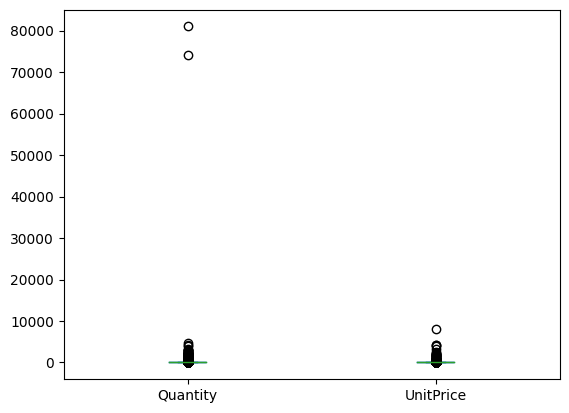

In [19]:
#Plotando dados com box plot
base_positivo.plot.box(column=['Quantity','UnitPrice'])

In [20]:
#Criando a condição
condicao = (base_positivo['Quantity'] <= 10000) & (base_positivo['UnitPrice'] <= 5000)
dados_sem_outliers = base_positivo[condicao]

<AxesSubplot:>

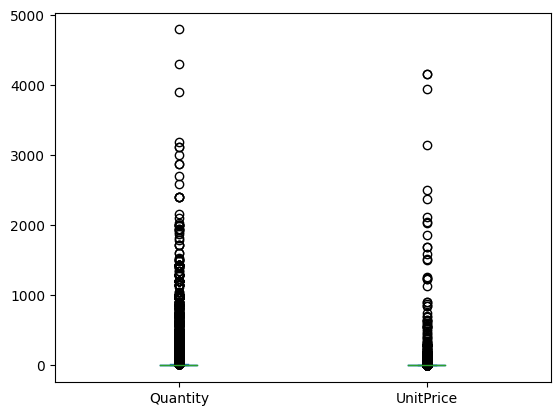

In [31]:
dados_sem_outliers.plot.box(column=['Quantity','UnitPrice'])

# Etapa 07) Crie uma coluna adicional

In [21]:
# Criando coluna Total
dados_sem_outliers['PrecoTotal'] = dados_sem_outliers['Quantity'] * dados_sem_outliers['UnitPrice']
dados_sem_outliers

<ipython-input-21-26f551b0b48d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_outliers['PrecoTotal'] = dados_sem_outliers['Quantity'] * dados_sem_outliers['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecoTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


# Etapa 08) Última data

In [22]:
#Encontrando a ultima data de compra
data_ultima_compra = dados_sem_outliers['InvoiceDate'].max()
data_ultima_compra

Timestamp('2011-12-09 12:50:00')

# Etapa 09) Plotando gráficos

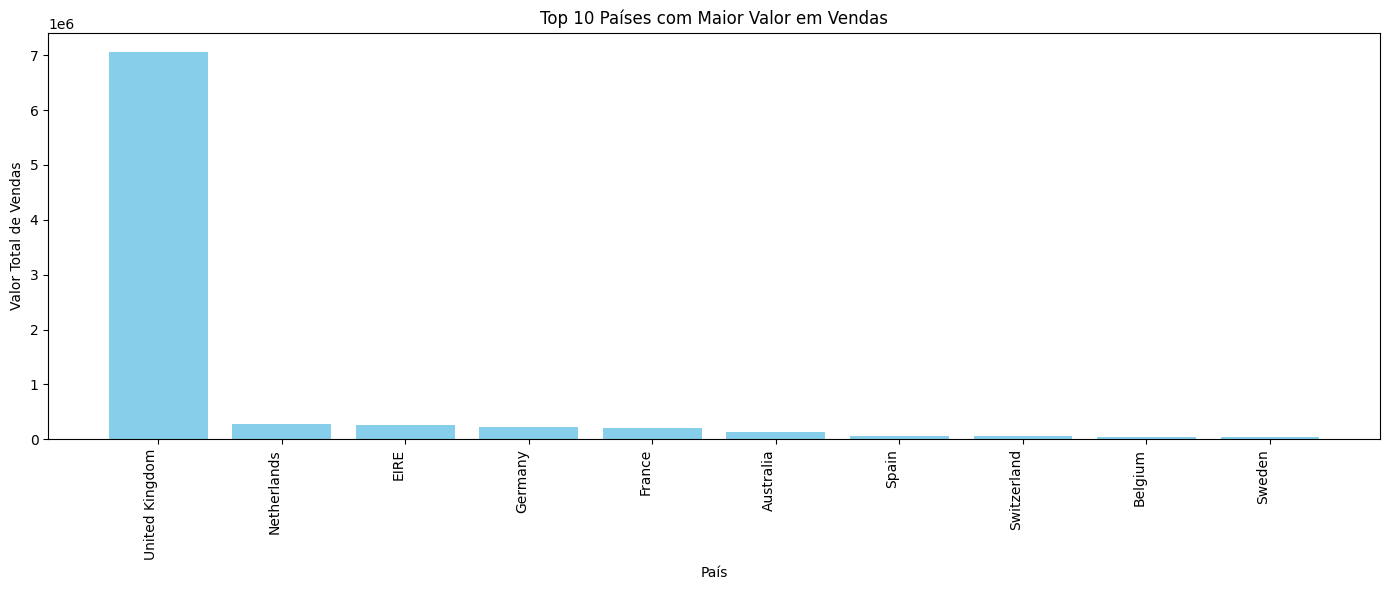

In [23]:
#Agrupando paises
vendas_por_pais = dados_sem_outliers.groupby('Country')['PrecoTotal'].sum().reset_index()

#Ordenando o df pelas vendas
top_10_paises = vendas_por_pais.sort_values(by='PrecoTotal', ascending=False).head(10)

#Criandoo gráfico de barras
plt.figure(figsize=(14, 6))  # Defina o tamanho da figura
plt.bar(top_10_paises['Country'], top_10_paises['PrecoTotal'], color='skyblue')

#Titulos
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=90, ha='right')

#Plot
plt.tight_layout()
plt.show()

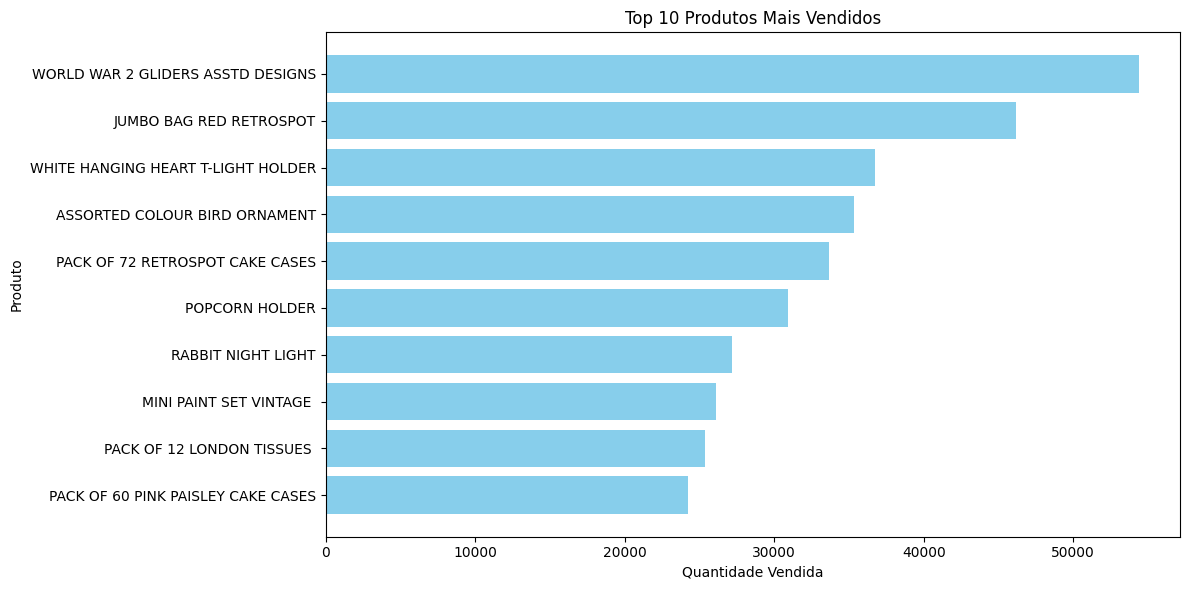

In [24]:
#Agrupando os dados por produto
produtos_mais_vendidos = dados_sem_outliers.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

#Ordenando os produtos por quantidade vendida
top_10_produtos = produtos_mais_vendidos.sort_values(by='Quantity', ascending=False).head(10)

#Criando o gráfico
plt.figure(figsize=(12, 6))
plt.barh(top_10_produtos['Description'], top_10_produtos['Quantity'], color='skyblue')

#Titulos
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Vendidos')
plt.gca().invert_yaxis()

#Plot
plt.tight_layout()
plt.show()

<ipython-input-25-afc081f215a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_outliers['Mês'] = dados_sem_outliers['InvoiceDate'].dt.month


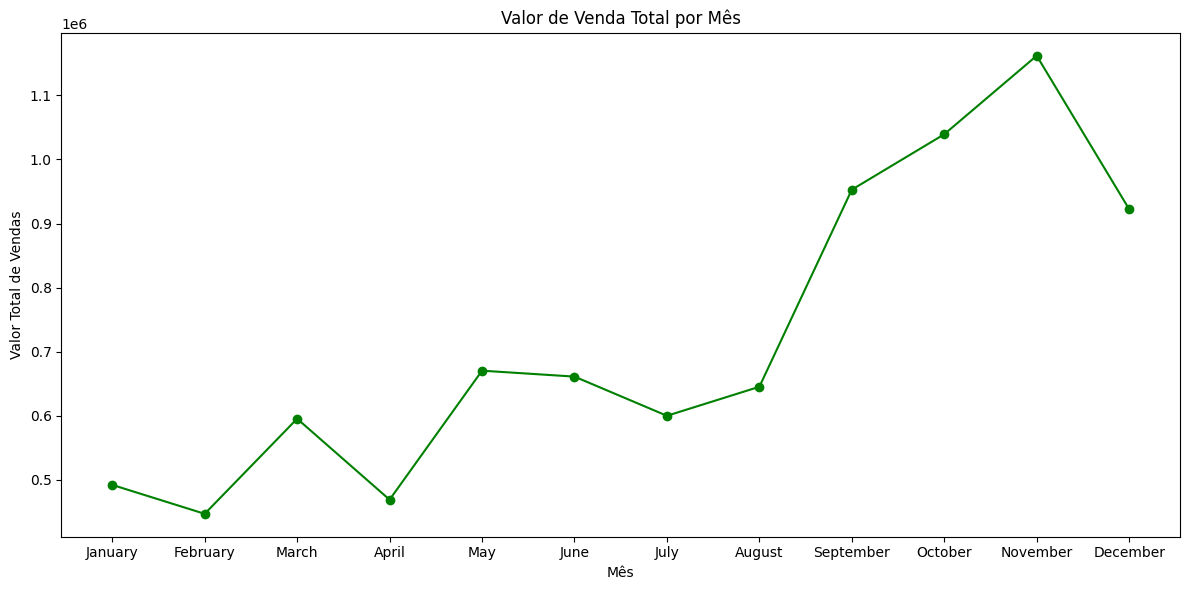

In [25]:
#Criando uma coluna adicional de mês
dados_sem_outliers['Mês'] = dados_sem_outliers['InvoiceDate'].dt.month

#Calculando o total por mês
vendas_por_mes = dados_sem_outliers.groupby('Mês')['PrecoTotal'].sum()

#Cria o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', linestyle='-', color='green')

#Titulos
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor de Venda Total por Mês')

#Plot
nomes_meses = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(1, 13), nomes_meses)
plt.tight_layout()
plt.show()

<ipython-input-26-d86c43e1426c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_top_10_paises['Mês'] = dados_top_10_paises['InvoiceDate'].dt.month


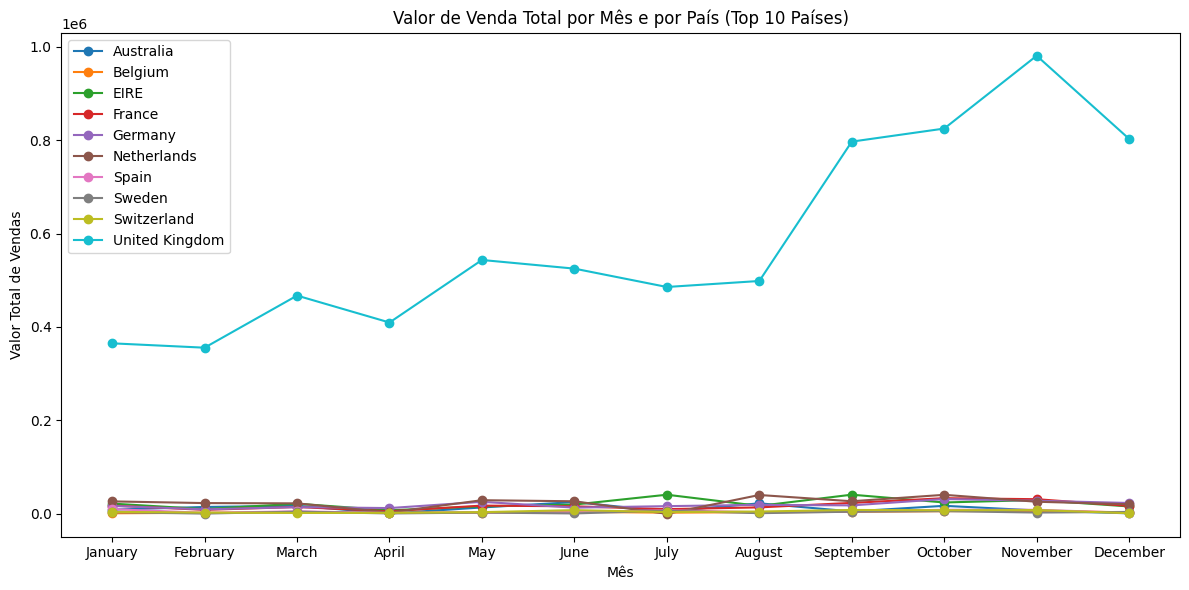

In [26]:
#Filtra o top 10 paises
dados_top_10_paises = dados_sem_outliers[dados_sem_outliers['Country'].isin(top_10_paises['Country'])]

#Cria uma coluna adicional com o mês
dados_top_10_paises['Mês'] = dados_top_10_paises['InvoiceDate'].dt.month

#Calcula o total por mes
vendas_por_mes_pais = dados_top_10_paises.groupby(['Mês', 'Country'])['PrecoTotal'].sum().unstack()

#Criao gráfico de linhas
plt.figure(figsize=(12, 6))
for pais in vendas_por_mes_pais.columns:
    plt.plot(vendas_por_mes_pais.index, vendas_por_mes_pais[pais], marker='o', linestyle='-', label=pais)

#Titulos
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')

#Plot
nomes_meses = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(1, 13), nomes_meses)
plt.legend()
plt.tight_layout()
plt.show()

# Etapa 10) Cálculo do RFM

In [27]:
#R
dados_sem_outliers['Recencia'] = (data_ultima_compra - dados_sem_outliers.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
dados_sem_outliers

<ipython-input-27-3c801391db55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_outliers['Recencia'] = (data_ultima_compra - dados_sem_outliers.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecoTotal,Mês,Recencia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,371
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,0


In [28]:
#F
frequencia = dados_sem_outliers.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']
frequencia

,CustomerID,Frequencia
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


In [29]:
#M
ticket_medio = dados_sem_outliers.groupby('CustomerID')['PrecoTotal'].mean().reset_index()
ticket_medio.columns = ['CustomerID', 'TicketMedio']
ticket_medio

,CustomerID,TicketMedio
0,12347,23.681319
1,12348,57.975484
2,12349,24.076027
3,12350,19.670588
4,12352,29.482824
...,...,...
4332,18280,18.060000
4333,18281,11.545714
4334,18282,14.837500
4335,18283,2.771005


In [30]:
#Criando um DF de RFM
rfm = pd.merge(frequencia, ticket_medio, on='CustomerID')
rfm = pd.merge(rfm, dados_sem_outliers[['CustomerID', 'Recencia']].drop_duplicates(), on='CustomerID')
rfm

,CustomerID,Frequencia,TicketMedio,Recencia
0,12347,7,23.681319,1
1,12348,4,57.975484,74
2,12349,1,24.076027,18
3,12350,1,19.670588,309
4,12352,8,29.482824,35
...,...,...,...,...
4332,18280,1,18.060000,277
4333,18281,1,11.545714,180
4334,18282,2,14.837500,7
4335,18283,16,2.771005,3
